In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def get_class_index(c_name, classes):
  for i in range(len(classes)):
    name = classes[i].split(' ')[-1].strip()
    if name == c_name:
      return i

def center_crop(frame):
    frame = frame[8:120, 30:142, :]
    return np.array(frame).astype(np.uint8)

with open('hmdb_labels.txt', 'r') as f:
    classes = f.readlines()
    f.close()

**Previous Model Architecture**

In [0]:
import torch
import torch.nn as nn

class Prev_Mod(nn.Module):

    def __init__(self, num_classes, pretrained=True):
        super(Prev_Mod, self).__init__()

        '''
        Pretrained feature extractor
        '''
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv3a = nn.Conv3d(128, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv3b = nn.Conv3d(256, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv4a = nn.Conv3d(256, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv4b = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool4 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv5a = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv5b = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool5 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=(0, 1, 1))
        self.fc6 = nn.Linear(8192, 4096)
        self.fc7 = nn.Linear(4096, 4096)

        '''
        Trained Layer
        '''
        self.fc8 = nn.Linear(4096, num_classes)

        if pretrained:
            self.__load_pretrained_weights()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.relu(self.conv3a(x))
        x = self.relu(self.conv3b(x))
        x = self.pool3(x)
        x = self.relu(self.conv4a(x))
        x = self.relu(self.conv4b(x))
        x = self.pool4(x)
        x = self.relu(self.conv5a(x))
        x = self.relu(self.conv5b(x))
        x = self.pool5(x)
        x = x.view(-1, 8192)
        x = self.relu(self.fc6(x))
        x = self.dropout(x)
        x = self.relu(self.fc7(x))
        x = self.dropout(x)

        logits = self.fc8(x)
        return logits

    def __load_pretrained_weights(self):
        corresp_name = {
                        "features.0.weight": "conv1.weight",
                        "features.0.bias": "conv1.bias",
                        "features.3.weight": "conv2.weight",
                        "features.3.bias": "conv2.bias",
                        "features.6.weight": "conv3a.weight",
                        "features.6.bias": "conv3a.bias",
                        "features.8.weight": "conv3b.weight",
                        "features.8.bias": "conv3b.bias",
                        "features.11.weight": "conv4a.weight",
                        "features.11.bias": "conv4a.bias",
                        "features.13.weight": "conv4b.weight",
                        "features.13.bias": "conv4b.bias",
                        "features.16.weight": "conv5a.weight",
                        "features.16.bias": "conv5a.bias",
                        "features.18.weight": "conv5b.weight",
                        "features.18.bias": "conv5b.bias",
                        "classifier.0.weight": "fc6.weight",
                        "classifier.0.bias": "fc6.bias",
                        "classifier.3.weight": "fc7.weight",
                        "classifier.3.bias": "fc7.bias",
                        }

        p_dict = torch.load('c3d-pretrained.pth')
        s_dict = self.state_dict()
        for name in p_dict:
            if name not in corresp_name:
                continue
            s_dict[corresp_name[name]] = p_dict[name]
        self.load_state_dict(s_dict)

**Current Model Architecture**

In [0]:
import torch
import torch.nn as nn

class Curr_Mod(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super(Curr_Mod, self).__init__()

        '''
        Pretrained feature extractor
        '''
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv3a = nn.Conv3d(128, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv3b = nn.Conv3d(256, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv4a = nn.Conv3d(256, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv4b = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool4 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv5a = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv5b = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool5 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=(0, 1, 1))
        self.fc6 = nn.Linear(8192, 4096)
        self.fc7 = nn.Linear(4096, 4096)

        '''
        Trained Layer
        '''
        self.fc8 = nn.Linear(4096, num_classes)

        '''
        Xavier Initialization
        '''
        torch.nn.init.xavier_uniform_(self.fc8.weight)

        if pretrained:
            self.__load_pretrained_weights()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.relu(self.conv3a(x))
        x = self.relu(self.conv3b(x))
        x = self.pool3(x)
        x = self.relu(self.conv4a(x))
        x = self.relu(self.conv4b(x))
        x = self.pool4(x)
        x = self.relu(self.conv5a(x))
        x = self.relu(self.conv5b(x))
        x = self.pool5(x)
        x = x.view(-1, 8192)
        x = self.relu(self.fc6(x))
        x = self.dropout(x)
        x = self.relu(self.fc7(x))
        x = self.dropout(x)

        logits = self.fc8(x)
        return logits

    def __load_pretrained_weights(self):
        corresp_name = {
                        "features.0.weight": "conv1.weight",
                        "features.0.bias": "conv1.bias",
                        "features.3.weight": "conv2.weight",
                        "features.3.bias": "conv2.bias",
                        "features.6.weight": "conv3a.weight",
                        "features.6.bias": "conv3a.bias",
                        "features.8.weight": "conv3b.weight",
                        "features.8.bias": "conv3b.bias",
                        "features.11.weight": "conv4a.weight",
                        "features.11.bias": "conv4a.bias",
                        "features.13.weight": "conv4b.weight",
                        "features.13.bias": "conv4b.bias",
                        "features.16.weight": "conv5a.weight",
                        "features.16.bias": "conv5a.bias",
                        "features.18.weight": "conv5b.weight",
                        "features.18.bias": "conv5b.bias",
                        "classifier.0.weight": "fc6.weight",
                        "classifier.0.bias": "fc6.bias",
                        "classifier.3.weight": "fc7.weight",
                        "classifier.3.bias": "fc7.bias",
                        }

        p_dict = torch.load('c3d-pretrained.pth')
        s_dict = self.state_dict()
        for name in p_dict:
            if name not in corresp_name:
                continue
            s_dict[corresp_name[name]] = p_dict[name]
        self.load_state_dict(s_dict)

In [0]:
# Action taken in the videos and paths to the trained models
action_name = 'climb_stairs'
model_path_prev = 'prev_model.pt'
model_path_curr = 'curr_model.pt'

The following function takes in the actual action from a video as well as the file paths to the trained model and video to be given to the model. The function also saves the time/label json and plot if specified as well as the time/label plot if specified. Additionally, the function now takes an argument to state whether we are using the previous or current model.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
from google.colab.patches import cv2_imshow

def get_vid_probs_and_json(action_name,model_path,video_path,save_fig_json=False,save_name_fig=None,save_name_json=None,prev=False):
    '''
    Load model
    '''
    if prev:
      model = Prev_Mod(num_classes=51,pretrained=False)
    else:
      model = Curr_Mod(num_classes=51,pretrained=False)

    model.load_state_dict(torch.load(model_path))
    model.cuda()
    model.eval()

    '''
    Get video
    '''
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    '''
    List for the timestamp/prob and list for the clips
    '''
    full_list = []
    clip = []

    '''
    Iterate through each frame in the video
    '''
    i = 0
    still_frames = True
    while still_frames:
        i+=1
        still_frames, frame = cap.read()
        if still_frames:
            if i > 15:
              # Only append if we are past the 16th frame as the previous are not used
              full_list.append([cap.get(cv2.CAP_PROP_POS_MSEC)/1000])
        else:
            break

        '''
        Adapted Preprocessing code
        '''
        resized = center_crop(cv2.resize(frame, (171, 128)))
        tmp = resized - np.array([[[90.0, 98.0, 102.0]]])
        clip.append(tmp)

        
        # Has to fit model shape so wait until we get 16 frames
        if len(clip) == 16:
          with torch.no_grad():
            inputs = np.array(clip).astype(np.float32)
            inputs = np.expand_dims(inputs, axis=0)
            inputs = np.transpose(inputs, (0, 4, 1, 2, 3))
            inputs = torch.from_numpy(inputs)
            inputs = torch.autograd.Variable(inputs, requires_grad=False).cuda()
            outputs = model.forward(inputs)

          probs = torch.nn.Softmax(dim=1)(outputs)

          class_index = get_class_index(action_name, classes)
          full_list[-1].append(probs[0][class_index].item())

          clip.pop(0)

    del full_list[-1]

    plt.xlabel('Time (seconds)')
    plt.ylabel('Prob of Given Action')
    plt.plot(np.array(full_list)[:,0],np.array(full_list)[:,1])
    if save_fig_json:
      plt.savefig(save_name_fig)

    full_json = {action_name: full_list}
    if save_fig_json:
        with open(save_name_json, 'w') as fp:
          json.dump(full_json, fp)

    return full_json


**Previous Model (Video 1)**

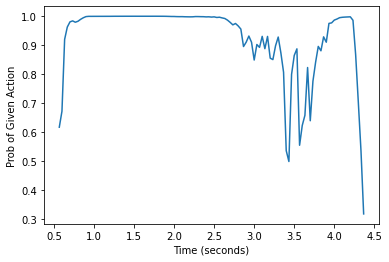

In [24]:
video_path = 'videos/climb_stairs/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_climb_stairs_f_nm_np1_fr_med_3.avi'
dl = get_vid_probs_and_json(action_name, model_path_prev, video_path,True,'fig1one','json1one',prev=True)

**Current Model (Video 1)**

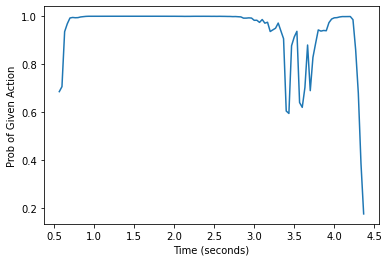

In [25]:
video_path = 'videos/climb_stairs/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_climb_stairs_f_nm_np1_fr_med_3.avi'
dl = get_vid_probs_and_json(action_name, model_path_curr, video_path,True,'fig1two','json1two')

**Previous Model (Video 2)**

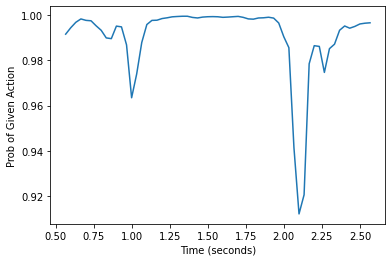

In [14]:
video_path = 'videos/climb_stairs/Beginner_Boxing_Lessons_-_Using_Stairs_for_Boxing_Training_climb_stairs_l_cm_np1_ba_med_0.avi'
dl = get_vid_probs_and_json(action_name, model_path_prev, video_path,True,'fig2one','json2one',prev=True)

**Current Model (Video 2)**

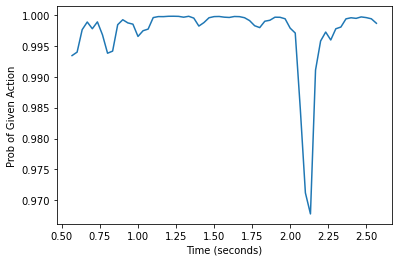

In [15]:
video_path = 'videos/climb_stairs/Beginner_Boxing_Lessons_-_Using_Stairs_for_Boxing_Training_climb_stairs_l_cm_np1_ba_med_0.avi'
dl = get_vid_probs_and_json(action_name, model_path_curr, video_path,True,'fig2two','json2two')

**Previous Model (Video 3)**

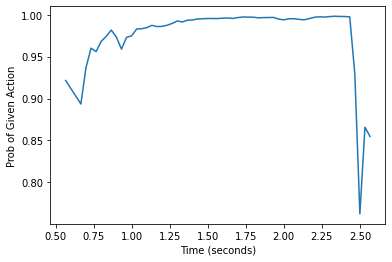

In [22]:
video_path = 'videos/climb_stairs/Empire_State_Building_Run-Up_climb_stairs_f_cm_np1_ba_med_3.avi'
dl = get_vid_probs_and_json(action_name, model_path_prev, video_path,True,'fig3one','json3one',prev=True)

**Current Model (Video 3)**

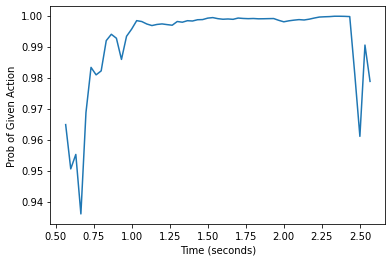

In [17]:
video_path = 'videos/climb_stairs/Empire_State_Building_Run-Up_climb_stairs_f_cm_np1_ba_med_3.avi'
dl = get_vid_probs_and_json(action_name, model_path_curr, video_path,True,'fig3two','json3two')

**Previous Model (Video 4)**

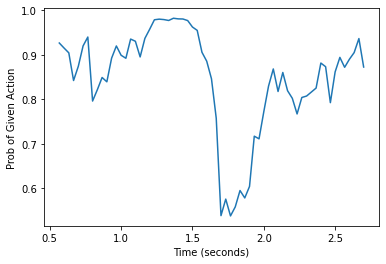

In [18]:
video_path = 'videos/climb_stairs/Treppen_steigen_climb_stairs_f_cm_np1_le_bad_7.avi'
dl = get_vid_probs_and_json(action_name, model_path_prev, video_path,True,'fig4one','json4one',prev=True)

**Current Model (Video 4)**

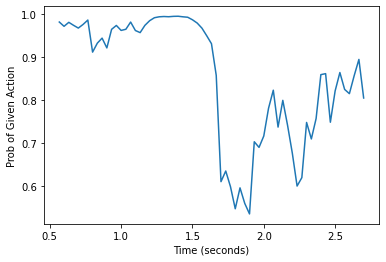

In [19]:
video_path = 'videos/climb_stairs/Treppen_steigen_climb_stairs_f_cm_np1_le_bad_7.avi'
dl = get_vid_probs_and_json(action_name, model_path_curr, video_path,True,'fig4two','json4two')

**Previous Model (Video 5)**

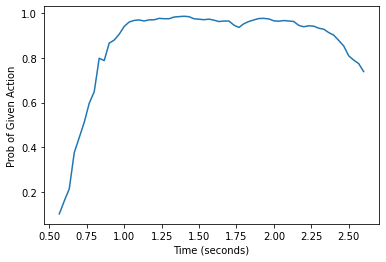

In [20]:
video_path = 'videos/climb_stairs/Running_Up_Stairs_climb_stairs_l_nm_np1_ba_med_0.avi'
dl = get_vid_probs_and_json(action_name, model_path_prev, video_path,True,'fig5one','json5one',prev=True)

**Current Model (Video 5)**

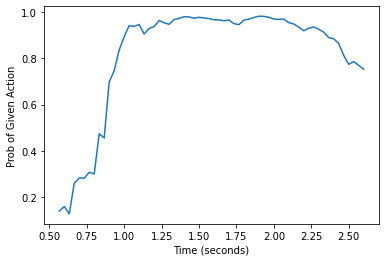

In [21]:
video_path = 'videos/climb_stairs/Running_Up_Stairs_climb_stairs_l_nm_np1_ba_med_0.avi'
dl = get_vid_probs_and_json(action_name, model_path_curr, video_path,True,'fig5two','json5two')